## Parameters used in the dataset:
    * temperature_2m - Air temperature at 2 meters above ground.
    * relativehumidity_2m - Relative humidity at 2 meters above ground.
    * dewpoint_2m - Dew point temperature at 2 meters above ground.
    * surface_pressure - Atmospheric air pressure reduced to mean sea level (msl) or pressure at surface.
    * rain - Only liquid precipitation of the preceding hour including local showers and rain from large scale systems.
    * cloudcover - Total cloud cover as an area fraction.
    * windspeed_10m - Wind speed at 10 or 100 meters above ground. Wind speed on 10 meters is the standard level.
    * winddirection_10m - Wind direction at 10 or 100 meters above ground.
    * soil_temperature_0_to_7cm - Average temperature of different soil levels below ground.


### Importing the Libraries


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Loading the dataset

In [13]:
df = pd.read_csv('Rainfall_Data.csv') 

### Exploratory Data Analysis

In [14]:
df.head() # to check the top 5 columns

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_0_to_7cm (°C)
0,2020-01-01T00:00,18.0,96,17.3,920.2,0.0,100,10.1,107,20.3
1,2020-01-01T01:00,18.1,95,17.3,920.9,0.0,100,10.4,110,20.2
2,2020-01-01T02:00,18.2,94,17.3,921.6,0.0,100,13.0,109,20.3
3,2020-01-01T03:00,19.7,83,16.7,922.9,0.0,100,15.5,112,21.1
4,2020-01-01T04:00,21.5,73,16.6,923.2,0.0,100,15.6,113,22.3


In [15]:
df.tail() # to check the bottom 5 columns

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_0_to_7cm (°C)
26299,2022-12-31T19:00,16.1,77,12.0,922.7,0.0,0,7.6,93,18.3
26300,2022-12-31T20:00,15.5,80,12.1,921.9,0.0,0,7.6,95,17.8
26301,2022-12-31T21:00,14.9,85,12.4,921.4,0.0,0,7.0,102,17.4
26302,2022-12-31T22:00,14.4,89,12.5,920.9,0.0,0,7.1,105,17.0
26303,2022-12-31T23:00,13.9,91,12.5,920.4,0.0,0,6.4,106,16.6


In [16]:
df.shape  #Dimensions of dataset

(26304, 10)

In [17]:
df.info() #Basic information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time                            26304 non-null  object 
 1   temperature_2m (°C)             26304 non-null  float64
 2   relativehumidity_2m (%)         26304 non-null  int64  
 3   dewpoint_2m (°C)                26304 non-null  float64
 4   surface_pressure (hPa)          26304 non-null  float64
 5   rain (mm)                       26304 non-null  float64
 6   cloudcover (%)                  26304 non-null  int64  
 7   windspeed_10m (km/h)            26304 non-null  float64
 8   winddirection_10m (°)           26304 non-null  int64  
 9   soil_temperature_0_to_7cm (°C)  26304 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 2.0+ MB


In [18]:
df.describe() # Statistical Summary

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_0_to_7cm (°C)
count,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.00000,26304.000000,26304.000000
mean,22.716735,72.138952,16.459082,918.009029,0.132592,51.748061,10.63834,181.308052,24.838728
std,3.964381,21.628971,3.901123,2.558279,0.497593,35.907968,4.96033,96.972286,4.405825
min,11.500000,13.000000,-2.600000,909.500000,0.000000,0.000000,0.00000,1.000000,14.100000
25%,20.000000,59.000000,14.600000,916.200000,0.000000,20.000000,7.10000,98.000000,21.800000
50%,22.100000,77.000000,18.000000,918.000000,0.000000,49.000000,9.90000,181.000000,23.900000
75%,25.200000,91.000000,19.100000,919.800000,0.000000,89.000000,13.40000,264.000000,27.000000
max,36.500000,100.000000,22.300000,927.000000,11.900000,100.000000,36.90000,360.000000,40.800000


### Null values or missing values to be checked

In [19]:
df.isnull().sum()

time                              0
temperature_2m (°C)               0
relativehumidity_2m (%)           0
dewpoint_2m (°C)                  0
surface_pressure (hPa)            0
rain (mm)                         0
cloudcover (%)                    0
windspeed_10m (km/h)              0
winddirection_10m (°)             0
soil_temperature_0_to_7cm (°C)    0
dtype: int64

In [20]:
df.duplicated().sum()

0

#### There are no Duplicates and null values in the dataset. The dataset is clean and we can proceed further.

array([[<AxesSubplot:title={'center':'temperature_2m (°C)'}>,
        <AxesSubplot:title={'center':'relativehumidity_2m (%)'}>,
        <AxesSubplot:title={'center':'dewpoint_2m (°C)'}>],
       [<AxesSubplot:title={'center':'surface_pressure (hPa)'}>,
        <AxesSubplot:title={'center':'rain (mm)'}>,
        <AxesSubplot:title={'center':'cloudcover (%)'}>],
       [<AxesSubplot:title={'center':'windspeed_10m (km/h)'}>,
        <AxesSubplot:title={'center':'winddirection_10m (°)'}>,
        <AxesSubplot:title={'center':'soil_temperature_0_to_7cm (°C)'}>]],
      dtype=object)

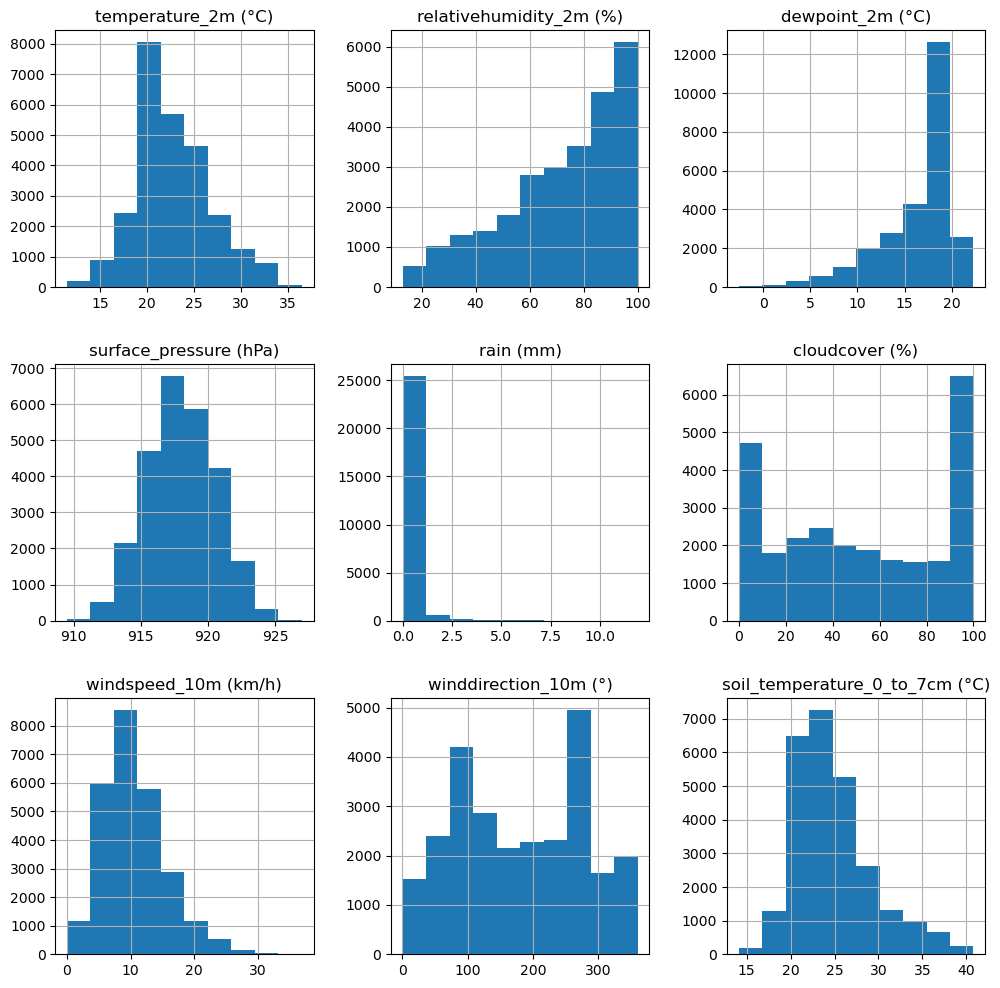

In [22]:
df.hist(figsize=(12,12))

In [29]:
df["rain (mm)"].describe() # rainfall distribution

count    26304.000000
mean         0.132592
std          0.497593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.900000
Name: rain (mm), dtype: float64

### Visualizing Rainfall with other columns to get better understanding 

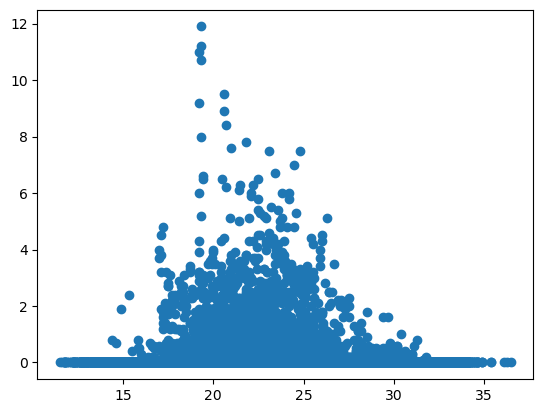

In [35]:
plt.scatter(df["temperature_2m (°C)"],df["rain (mm)"]) 

<AxesSubplot:>

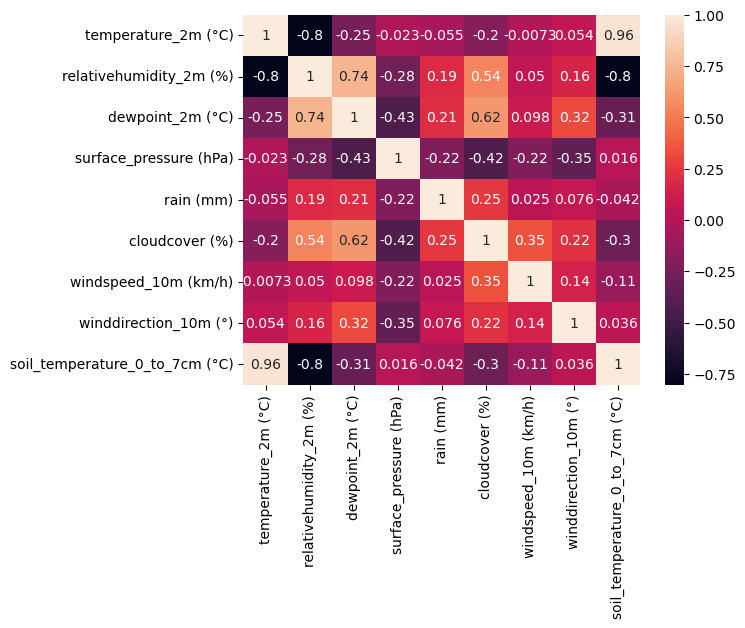

In [37]:
sns.heatmap(df.corr(), annot=True)

### Splitting the input and output data

In [113]:
Y = df['rain (mm)'] # Dependant variable

In [114]:
X = df.drop('rain (mm)', axis =1) # Independent variables


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [117]:
np.shape(X_test)

(5261, 8)

### Linear Regression Model

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lm = LinearRegression()

In [120]:
# Train and fit the data
lm.fit(X_train,Y_train)

LinearRegression()

In [123]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.05924345  0.00299268  0.00063399 -0.02430277  0.00302714 -0.00249099
 -0.00015145  0.06581022]


### Predict the test data

In [124]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

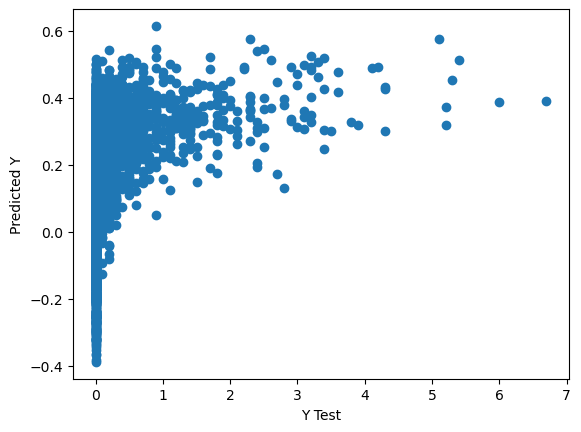

In [125]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [139]:
mean_absolute_error(Y_test, predictions)

0.20810005817202304

### Evaluating the Model

In [127]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


MAE: 0.20810005817202304
MSE: 0.18064832741735312
RMSE: 0.4250274431343853


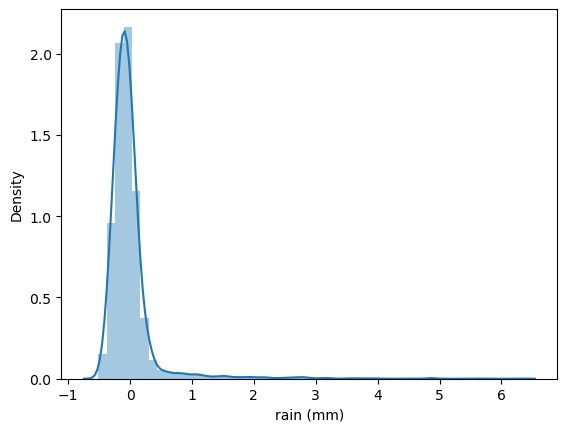

In [128]:
sns.distplot((Y_test-predictions),bins=50);

In [144]:
from sklearn.metrics import r2_score #Testing accuracy
r2_score(Y_test,predictions)

0.12318327885371838

### Random Forest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [137]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
mean_absolute_error(Y_test, Y_pred)

0.14004834129248753

In [141]:
from sklearn.linear_model import Lasso

### Lasso Regression

In [143]:
lrf = Lasso(alpha = 1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None)
lrf.fit(X_train, Y_train)
Y_pred = lrf.predict(X_test)
mean_absolute_error(Y_test, Y_pred)

0.1884720574906624